# Scikit - Learn 을 활용한 선형 회귀

## 보스톤 집값 예측

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import sklearn

## 데이터에 대한 이해

In [5]:
from sklearn.datasets import load_boston
boston = load_boston()

In [6]:
type(boston)

sklearn.utils.Bunch

In [7]:
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [8]:
data = boston.data
label = boston.target
columns = boston.feature_names

In [10]:
data = pd.DataFrame(data, columns = columns)
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [11]:
data.shape

(506, 13)

In [12]:
data.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000


In [13]:
label[:5]

array([24. , 21.6, 34.7, 33.4, 36.2])

## 훈련 데이터와 테스트 데이터 분리

In [20]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(data, label, test_size=0.2, random_state=2019)

# 1. 단순 선형회귀

## 1) 모델 불러오기 및 정의하기

In [21]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

## 2) 모델 학습하기(훈련데이터)

In [24]:
model.fit(x_train['RM'].values.reshape((-1,1)), y_train)

LinearRegression()

## 3)결과 예측하기(데스트 데이터)

In [25]:
x_test['RM'].shape, x_test['RM'].values.shape, x_test['RM'].values.reshape((-1,1)).shape

((102,), (102,), (102, 1))

In [26]:
y_pred = model.predict(x_test['RM'].values.reshape((-1,1)))

## 결과 살펴보기

### - 일반적으로 선형회귀 R2(R Square)를 평가 척도로 사용
### - R2 값이 1에 가까울수록 회귀 모델이 데이터를 잘 표현한다는 것을 의미

In [27]:
from sklearn.metrics import r2_score

In [28]:
print('단순 선형 회귀, R2 : {:.4f}'.format(r2_score(y_test, y_pred)))

단순 선형 회귀, R2 : 0.1795


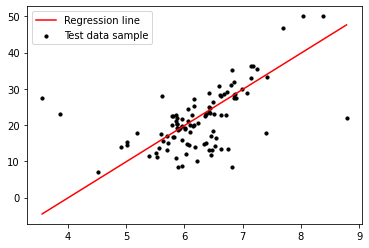

In [29]:
line_x = np.linspace(np.min(x_test['RM']), np.max(x_test['RM']), 10)
line_y = model.predict(line_x.reshape((-1, 1)))

plt.scatter(x_test['RM'], y_test, s=10, c='black')
plt.plot(line_x, line_y, c = 'red')
plt.legend(['Regression line', 'Test data sample'], loc='upper left')

### 회귀 모델의 계수 w, 절편 b 살펴보기

In [30]:
print('단순 선형 회귀, 계수(w) : {:.4f}, 절편(b) : {:.4f}'.format(model.coef_[0], model.intercept_))

단순 선형 회귀, 계수(w) : 9.9900, 절편(b) : -40.0941


## 5)모든 변수에 대해 R2 값 계산하기

In [31]:
columns

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [32]:
for col_name in columns:
    model.fit(x_train[col_name].values.reshape((-1, 1)), y_train)
    y_pred = model.predict(x_test[col_name].values.reshape((-1, 1)))
    print(col_name + ' -\tR2 : {:.4f}'.format(r2_score(y_test, y_pred)))

CRIM -	R2 : 0.1207
ZN -	R2 : 0.1764
INDUS -	R2 : 0.1893
CHAS -	R2 : -0.0193
NOX -	R2 : 0.2612
RM -	R2 : 0.1795
AGE -	R2 : 0.2700
DIS -	R2 : 0.0830
RAD -	R2 : 0.1408
TAX -	R2 : 0.2004
PTRATIO -	R2 : 0.2377
B -	R2 : 0.1464
LSTAT -	R2 : 0.5062


# 2. 다중 선형 회귀

-x의 개수가 2개 이상인 경우
-x 변수로 보스톤 데이터셋에 존재하는 모든 변수를 사용

## 1) 모델 불러오기 및 정의하기

In [34]:
model2 = LinearRegression()

## 2)모델 학습하기(훈련데이터)

In [35]:
model2.fit(x_train, y_train)

LinearRegression()

## 3) 결과 예측하기 (테스트 데이터)

In [36]:
y_pred = model2.predict(x_test)

## 4) 결과 살펴보기

In [37]:
print('다중 선형 회귀, R2 : {:.4f}'.format(r2_score(y_test, y_pred)))

다중 선형 회귀, R2 : 0.6174


### 회귀 모델의 계수 w, 절편 b 살펴보기

In [38]:
print('다중 선형 회귀, 계수(w) : {}'.format(model2.coef_))
print('다중 선형 회귀, 절편(b) : {:.4f}'.format(model2.intercept_))

다중 선형 회귀, 계수(w) : [-1.39521123e-01  4.17817156e-02 -4.57312740e-03  3.78506106e+00
 -1.46255552e+01  4.52548061e+00  1.49683102e-04 -1.38217694e+00
  2.78132923e-01 -1.03183306e-02 -8.42539713e-01  1.05460752e-02
 -5.19900681e-01]
다중 선형 회귀, 절편(b) : 27.2753
